<a href="https://colab.research.google.com/github/hida0/ESAA-2022-2/blob/HW/Week10_HW2_TopicModeling_%EB%AC%B8%EC%84%9C_%EC%9C%A0%EC%82%AC%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [교재 필사]
파이썬 머신러닝 완벽 가이드 ch8.6-9(7 제외) pg. 512-516, 529-543

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 1. 토픽 모델링(Topic Modeling) - 20 뉴스그룹
- **토픽 모델링**은 **문서 집합에 숨어있는 주제를 찾아내는 것**이다. 많은 양의 문서가 있을 때 사람이 이 문서를 다 읽고 핵심 주제를 찾는 것은 매우 많은 시간이 소모된다. 이러한 경우에 머신러닝 기반의 토픽 모델링을 적용하여 숨어있는 중요한 주제를 효과적으로 찾아낼 수 있다.
- 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 반면, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출한다.
- 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법은 **LSA**(Latent Semantic Analysis)와 **LDA**(Latent Dirichlet Allocation)이다. 
- 앞의 텍스트 분류에서 소개한 20 뉴스그룹 데이터 세트와 LDA를 이용하여 토픽 모델링을 수행한다.


### 1. 토픽 모델링(Topic Modeling) - 20 뉴스그룹
- 20 뉴스그룹은 20가지의 주제를 가진 뉴스그룹의 데이터를 가지고 있다. 이 중에서 모토사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학의 8개 주제를 추출하고 이들 텍스트에 LDA 기반의 토픽 모델링을 적용한다.
- 사이킷런은 LDA 기반의 토픽 모델링을 **`sklearn.decomposition`**으로부터의 **`LatentDirichletAllocation`** 클래스로 제공한다. 
- 먼저 LDA 토픽 모델링을 위해 **`fetch_20newsgroups()`** API는 **`categories`** 파라미터를 통해 **필요한 주제들만 필터링하여 추출**하고, 추출된 텍스트를 Count 기반으로 벡터화한다. **LDA는 Count 기반의 벡터화만 사용**한다.
- CountVectorizer의 파라미터를 **`max_features=1000`**으로 **word 피처의 개수를 제한**하고, **`ngram_range=(1,2)`**로 설정하여 벡터화 객체를 생성하고, 피처 벡터화 변환한다.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#모토사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

#categories 파라미터에 cats를 입력하여 위에서 cats 변수로 기재된 카테고리만 추출
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories=cats, random_state=0)

#Count 기반 피처 벡터화
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print("CountVectorizer Shape: ", feat_vect.shape)

CountVectorizer Shape:  (7862, 1000)


### 1. 토픽 모델링(Topic Modeling) - 20 뉴스그룹
- CountVectorizer 객체에 `fit_transform`을 적용한 feat_vect 모두 **7862개의 문서가 1000개의 피처로 구성된 행렬 데이터**이다. 
- 이렇게 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행한다. 토픽이 개수는 위의 뉴스그룹에서 추출한 주제와 동일한 8개로 정한다. 
- **`LatentDirichletAllocation`** 클래스의 **`n_components`** 파라미터를 이용하여 이 **토픽의 개수를 조정**한다.
- **`LatentDirichletAllocation.fit(데이터 세트)`**를 수행하면 LatentDirichletAllocation 객체는 **`components_`** 속성값을 가지게 된다. 
- **`components_`**는 **개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당되었는지**에 대한 수치를 가지고 있다. **높은 값**일수록 해당 word 피처는 **그 토픽의 중심 word**가 된다.
- `components_`의 형태와 속성값을 확인해보면 array[8, 1000]으로 구성되어 있다. **8개의 토픽별**로 **1000개의 word 피처**가 **해당 토픽별로 연관도** 값을 가지고 있다. 
- 즉 0번째 row, 10번째 col에 있는 값은 Topic #0에 대하여 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처(단어)가 Topic #0에 연관되는 수치 값을 가지고 있다.

In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

### 1. 토픽 모델링(Topic Modeling) - 20 뉴스그룹
- **`lda_model.components_`** 만으로는 각 토픽별 word 연관도를 보기 어렵다. 따라서 display_topics() 함수를 만들어서 각 토픽별로 연관도가 높은 순으로 word를 나열한다.
- CountVectorizer 객체에 **`get_feature_names()`**를 이용하여 전체 word의 명칭을 추출할 수 있다.
- 20 뉴스그룹에서 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개를 주제로 하여 추출하였다. 8개의 토픽으로 모델링이 잘 되었는지 확인하기 위해 토픽과 word의 연관성을 살펴본다.

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print("Topic #", topic_index)

        #components_ array에서 가장 값이 큰 순서로 정렬했을 때 그 값의 array 인덱스를 반환
        topic_word_indexes=topic.argsort()[::-1] #내림차순으로 인덱스 반환
        top_indexes=topic_word_indexes[:no_top_words] #지정한 순위까지의 인덱스 반환

        #top_indexes 대상인 인덱스별로 feature_names에 해당하는 word_feature 추출 후 join으로 concat
        feature_concat='  '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

In [ ]:
#CountVectorizer 객체 내의 전체 word의 명칭을 get_feature_names()를 통해 추출
feature_names=count_vect.get_feature_names()

#토픽별 가장 연관도가 높은 word를 15개 추출
display_topics(lda, feature_names, 15)

Topic # 0
year  10  game  medical  health  team  12  20  disease  cancer  1993  games  years  patients  good
Topic # 1
don  just  like  know  people  said  think  time  ve  didn  right  going  say  ll  way
Topic # 2
image  file  jpeg  program  gif  images  output  format  files  color  entry  00  use  bit  03
Topic # 3
like  know  don  think  use  does  just  good  time  book  read  information  people  used  post
Topic # 4
armenian  israel  armenians  jews  turkish  people  israeli  jewish  government  war  dos dos  turkey  arab  armenia  000
Topic # 5
edu  com  available  graphics  ftp  data  pub  motif  mail  widget  software  mit  information  version  sun
Topic # 6
god  people  jesus  church  believe  christ  does  christian  say  think  christians  bible  faith  sin  life
Topic # 7
use  dos  thanks  windows  using  window  does  display  help  like  problem  server  need  know  run


### 2. 문서 유사도
#### 1) 문서 유사도 측정 방법 - 코사인 유사도
- **문서와 문서 간의 유사도 비교**는 일반적으로 **코사인 유사도**(Cosine Similarity)를 사용한다. 
- 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반한다. 즉 **두 벡터 사이의 사잇각을 구하여 얼마나 유사한지 수치로 적용**한 것이다.

#### 2) 두 벡터 사잇각
- 두 벡터의 사잇각에 따라서 상호 관계는 다음과 같이 유사하거나 관련이 없거나 아예 반대 관계가 된다.
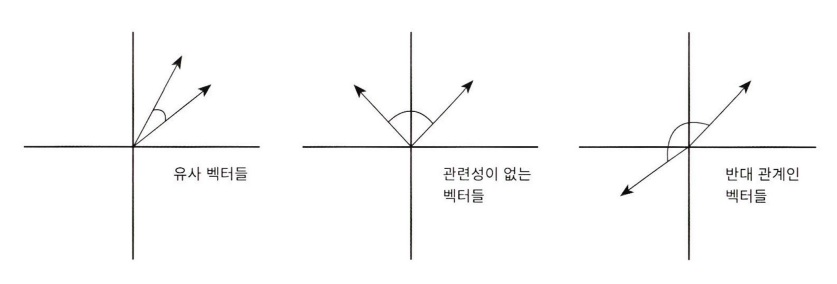
- 두 벡터 A와 B의 코사인 값은 내적을 이용하여 구할 수 있다. 두 벡터 A와 B의 내적 값은 두 벡터의 크기를 곱한 값의 코사인 각도 값을 곱한 것이다. $A*B=\|A\|\|B\|cos\theta$
- 따라서 유사도 $cos\theta$는 다음과 같이 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것이다. similarity = $cos\theta$ = $\frac{A*B}{\|A\|\|B\|}$= $\frac{\sum_{i=1}^nA_iBi}{\sqrt{\sum_{i=1}^nA_i^2}\sqrt{\sum_{i=1}^nB_i^2}}$

#### 1) 문서 유사도 측정 방법 - 코사인 유사도
- **코사인 유사도가 문서의 유사도 비교에 가장 많이 사용**되는 이유가 있다. 먼저 **문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬**이 되기 쉽다. 이러한 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표(ex.유클리드 거리 기반)는 정확도가 떨어지기 쉽다.
- 또한 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이므로 이러한 빈도수에만 기반해서는 공정한 비교를 할 수 없다.
- 간단한 문서에 대하여 서로 간의 문서 유사도를 코사인 유사도 기반으로 구한다. 먼저 2개의 넘파이 배열에 대한 코사인 유사도를 구하는 함수 cos_similarity()를 생성한다.
- doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환한다.


In [ ]:
import numpy as np
def cos_similarity(v1, v2):
    dot_product=np.dot(v1, v2) #내적(분자)
    l2_norm=(np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2)))) #크기의곱(분모)
    similarity=dot_product/l2_norm
    return similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc_list=['if you take the blue pill, the story ends', 'if you take the red pill, you stay in Wonderland', 'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple=TfidfVectorizer()
feature_vect_simple=tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


#### 1) 문서 유사도 측정 방법 - 코사인 유사도
- 반환된 행렬은 희소 행렬이므로 앞에서 작성한 함수의 인자인 array로 만들기 위해 **`todense()`**를 이용하여 밀집 행렬로 변환한뒤 다시 각각을 배열로 변환한다. 
- feature_vect_dense[0]은 doc_list 첫번재 문서의 피처 벡터화, feature_vect_dense[1]은 doc_list 두번재 문서의 피처 벡터화이다. 
- cos_similarity() 함수를 이용하여 2개 문서의 유사도를 측정한다. 첫번째 문장과 두번째 문장의 코사인 유사도는 0.402이다.
- 첫번째 문장과 세번째 문장, 두번째 문장과 세번째 문장의 유사도도 측정한다.

In [ ]:
#TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 이를 밀집 행렬로 변환
feature_vect_dense=feature_vect_simple.todense()

#첫번째, 두번째 문장의 피처 벡터 추출
vect1=np.array(feature_vect_dense[0]).reshape(-1, )
vect2=np.array(feature_vect_dense[1]).reshape(-1, )

#첫번째 문장과 두번째 문장의 피처 벡터로 2개 문장의 코사인 유사도 측정
similarity_simple=cos_similarity(vect1,vect2)
print("문장 1, 문장 2 Cosine 유사도: {0:.3f}".format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [ ]:
#첫번째 문장과 세번째 문장의 피처 벡터로 2개 문장의 코사인 유사도 측정
vect3=np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple=cos_similarity(vect1,vect3)
print("문장 1, 문장 3 Cosine 유사도: {0:.3f}".format(similarity_simple))

#두번째 문장과 세번째 문장의 피처 벡터로 2개 문장의 코사인 유사도 측정
similarity_simple=cos_similarity(vect2,vect3)
print("문장 2, 문장 3 Cosine 유사도: {0:.3f}".format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


#### 1) 문서 유사도 측정 방법 - 코사인 유사도
- 사이킷런은 코사인 유사도를 측정하기 위해 **`sklearn.metrics.pairwise.cosine_similarity`** API를 제공한다. 
- **`cosine_similarity()`** 함수는 2개의 입력 파라미터를 받는다. 첫번째 파라미터는 **비교 기준이 되는 문서의 피처 행렬**, 두번째 파라미터는 **비교되는 문서의 피처 행렬**이다.
- 또한 **`cosine_similarity()`** 함수는 희소 행렬, 밀집 행렬 모두가 가능하며, 행렬 또는 배열 모두 가능하다. 따라서 별도의 변환 작업이 필요없다.
- doc_list로 정의된 3개의 간단한 문서에 대하여 첫번째 문서와 비교해 바로 자신 문서인 첫번째 문서, 그리고 두번째, 세번째 문서의 유사도를 측정한다.
- 첫번째 유사도 값인 1은 비교 기준인 첫번째 문서 자신에 대한 유사도 측정이다. 두번째 유사도 값인 0.40207758은 첫번째 문서와 두번째 문서의 유사도,  세번째 유사도 값인 0.40425045은 첫번째 문서와 세ㅔ번째 문서의 유사도 값이다.
- 비교 대상 파라미터를 `feature_vect[1:]`로 지정하면 비교 기준 문서를 제외한 유사도 값을 구할 수 있다.
---
- **`cosine_similarity()`** 는 쌍(pair)으로 코사인 유사도 값을 제공할 수 있다. 
- 모든 개별 문서에 쌍으로 코사인 유사도 값을 계산한다. 즉 첫번째 문서와 두,세번째 문서의 코사인 유사도, 두번째 문서와 첫,세번째 문서의 코사인 유사도, 세번째 문서와 첫,두번째 문서의 코사인 유사도를 **ndarray** 형태로 제공한다.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_simple_pair=cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [ ]:
similarity_simple_pair=cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [ ]:
similarity_simple_pair=cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('Shape: ', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
Shape:  (3, 3)


#### 3) Opinion Review 데이터 세트를 이용한 문서 유사도 측정
- Opinion Review 데이터 세트를 이용하여 이들 문서 간의 유사도를 측정한다.
- 해당 문서의 군집화는 전자제품, 호텔, 자동차를 주제로 군집화된다. 이 중 호텔을 주제로 군집화된 문서를 이용하여 특정 문서와 다른 문서 간의 유사도를 알아본다.


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string, nltk
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
  return nltk.word_tokenize(text.lower().translate(remove_punct_dict))

In [ ]:
import pandas as pd
import glob, os
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

path = r'/content/drive/MyDrive/ESAA/data/OpinosisDataset1.0/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('||')[-1]
    filename = file_.split(',')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())
    
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label']=cluster_label

#### 3) Opinion Review 데이터 세트를 이용한 문서 유사도 측정
- 문서를 피처 벡터화해서 변환하면 문서 내 단어(word)에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처 값으로 벡터화된다. 이렇게 각 문서가 피처 벡터화된 데이터를 **`cosine_similarity()`**를 이용하여 상호 비교해 유사도를 확인한다.
- 먼저 이를 위해 **호텔을 주제로 군집화된 데이터를 추출하고 이 데이터에 해당하는 TfidfVectorizer의 데이터를 추출**한다. 호텔 군집화 데이터를 기반으로 별도의 TF-IDF 벡터화를 수행하지 않고, 바로 TfidfVectorizer로 만들어진 데이터에서 그대로 추출한다.
- DataFrame 객체 변수인 **document_df에서 먼저 호텔로 군집화된 문서의 인덱스를 추출**한다. 이렇게 추출된 인덱스를 그대로 이용해 TfidfVectorizer 객체 변수인 **feature_vect에서 호텔로 군집화된 문서의 피처 벡터를 추출**한다.

In [ ]:
#cluster_label=1인 데이터는 호텔로 군집화된 데이터로, DataFrame에서 해당 인덱스를 추출
hotel_indexes=document_df[document_df['cluster_label']==1].index
print("호텔로 군집화된 문서들의 DataFrame Index: ", hotel_indexes)

#호텔로 군집화된 데이터 중 첫번째 문서를 추출하여 파일명 표시
comparison_docname=document_df.iloc[hotel_indexes[0]]['filename']
print("##### 비교 기준 문서명 ", comparison_docname, "와 타 문서 유사도 #####")

#document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature 추출
#이를 이용해 호텔로 군집화된 문서 중 첫번째 문서와 다른 문서 간의 코사인 유사도 측정
similarity_pair=cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 DataFrame Index:  Int64Index([3, 5, 6, 13, 21, 23, 29, 30, 32, 34, 36, 37, 40, 43, 46, 48], dtype='int64')
##### 비교 기준 문서명  /content/drive/MyDrive/ESAA/data/OpinosisDataset1.0/OpinosisDataset1.0/topics/food_swissotel_chicago.txt.data 와 타 문서 유사도 #####
[[1.         0.05642164 0.85101936 0.04961524 0.07405241 0.05822825
  0.32479066 0.32194633 0.31194028 0.05751673 0.13996639 0.163092
  0.04949318 0.0498276  0.07324257 0.07385841]]


#### 3) Opinion Review 데이터 세트를 이용한 문서 유사도 측정
- 단순히 숫자로만 표시해서는 직관적으로 문서가 어느 정도 유사도를 가지는지 이해하기 어렵다. 따라서 첫번째 문서와 다른 문서 간의 유사도가 높은 순으로 이를 정렬하고, 시각화한다.
- `cosine_similarity()`는 쌍 형태의 ndarray를 반환하므로, 이를 판다스 인덱스로 이용하기 위해 `reshape(-1)`을 이용하여 1차원 배열로 반환한다.

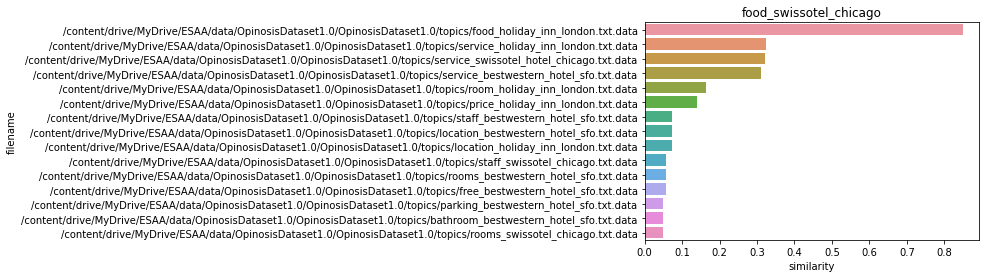

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#첫번째 문서와 타 문서 간의 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index=similarity_pair.argsort()[:, ::-1]
sorted_index=sorted_index[:, 1:]

#유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes=hotel_indexes[sorted_index.reshape(-1)]

#유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value=np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value=hotel_1_sim_value[1:]

#유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df=pd.DataFrame()
hotel_1_sim_df['filename']=document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity']=hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title('food_swissotel_chicago')
plt.show()

### 3. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석
- 네이버 영화 평점 데이터를 기반으로 감성 분석을 적용한다.
- 그 전에 먼저 한글 NLP 처리에서 주의할 점과 대표적인 파이썬 기반의 한글 형태소 패키지인 KoNLPy를 소개한다.

#### 1) 한글 NLP 처리의 어려움
- 일반적으로 한글 언어 처리는 영어 등의 라틴어 처리보다 어려운데, 주된 원인은 '띄어쓰기'와 '다양한 조사'때문이다.
- 띄어쓰기를 잘못하면 의미가 왜곡되어 전달된다. 
- 조사는 주어나 목적어를 위해 추가되며, 워낙 경우의 수가 많기 때문에 어근 추출(Stemming/Lemmatization) 등의 전처리 시 제거하기가 까다롭다.


#### 2) KoNLPy 소개
- **KoNLPy**는 **파이썬의 대표적인 한글 형태소 패키지**이다.
- 형태소의 사전적인 의미는 '**단어로서 의미를 가지는 최소 단위**'로 정의할 수 있다. **형태소 분석**이란 **말뭉치를 이러한 형태소 어근 단위로 쪼개고, 각 형태소에 품사 태깅을 부착하는 작업**을 일반적으로 지칭한다.
- KoNLPy는 기존의 C/C++, Java로 잘 만들어진 한글 형태소 엔진을 파이썬 래퍼(Wrapper) 기반으로 재작성한 패키지이다. 꼬꼬마(Kkma), 한나눔(Hannanum), Komoran, 은전한닢 프로젝트(Mecab), Twitter와 같이 5개의 형태소 분석 모듈을 KoNLPy에서 모두 사용할 수 있다.
- 잘 만들어진 한글 형태소 엔진을 파이썬 래퍼 기반으로 재작성한 패키지이므로, Java가 먼저 설치되어 있어야 하며 별도의 모듈인 JPype1도 필요하다.

In [ ]:
!pip install konlpy

#### 3) 데이터 로딩 
- 테스트 데이터가 별도로 있으니 이를 이용하여 평가한다. 먼저 ratings_train.txt 파일을 DataFrame으로 로딩하고 데이터를 살펴본다. 탭(\t)으로 칼럼이 분리되어 있으므로 `read_csv()`의 `sep='\t'`로 설정한다.
- 학습 데이터 세트의 label은 0과 1로, 1이 긍정, 0이 부정 감성이다.  label의 비율을 살펴보면 어느 한쪽으로 치우치지 않고 균등하다.
- train_df의 경우 리뷰 텍스트를 가지는 document 칼럼에 Null이 일부 존재하므로 이 값은 공백으로 변환한다. 
- 문자가 아닌 숫자이 경우 단어적인 의미로 부족하므로 파이썬의 정규 표현식 모듈인 **`re`**를 이용해 공백으로 변환한다.
- 테스트 데이터 세트에도 파일을 로딩하고 동일한 데이터 가공을 수행한다.

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/ESAA/data/ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [ ]:
train_df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [ ]:
import re

train_df=train_df.fillna(' ')
#정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미)
train_df['document']=train_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

#테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df=pd.read_csv('/content/drive/MyDrive/ESAA/data/ratings_test.txt', sep='\t')
test_df=test_df.fillna(' ')
test_df['document']=test_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

#id 칼럼 삭제
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

#### 4) 단어 토큰화 및 피처 벡터화
- 먼저 **각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화**한다. 한글 형태소 엔진은 SNS 분석에 적합한 **`Twitter`** 클래스를 이용한다.
- Twitter 객체의 **`morphs()`** 메서드를 이용하면 **입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환**한다.
- 문장을 형태소 단어 형태로 반환하는 별도의 tokenizer 함수 tw_tokenizer()를 생성한다.
---
- 사이킷런의 **`TfidfVectorizer`**를 이용하여 TF-IDF 피처 모델을 생성한다. tokenizer는 위에서 만든 tw_tokenizer() 함수를 이용한다.  
- 파라미터를 `ngram_range=(1,2), min_df=3, max_df=0.9`로 설정한 TfidfVectorizer 객체를 생성하고, `fit()`과 `transform()`을 이용하여 피처 벡터화한다.


In [ ]:
from konlpy.tag import Twitter
twitter=Twitter()

def tw_tokenizer(text):
    #입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
    tokens_ko=twitter.morphs(text)
    return tokens_ko

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Twitter 객체의 morphs() 객체를 이용한 tokenizer 사용
tfidf_vect=TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train=tfidf_vect.transform(train_df['document'])

#### 5) 감성 분석 수행
- 로지스틱 회귀를 이용하여 분류 기반의 감성 분석을 수행한다.
- 로지스틱 회귀의 하이퍼 파라미터 `C`의 최적화를 위해 GridSearchCV를 이용한다.
- C가 3.5일때 최고 0.8593의 정확도를 보였다.
---
- 테스트 세트를 이용하여 최종 감성 분석 예측을 수행한다.
- **테스트 세트를 이용하여 예측할 때는 학습할 때 적용한 TfidfVectorizer를 그대로 사용해**야 한다. 그래야만 학습시 설정된 TfidfVectorizer의 피처 개수와 테스트 데이터를 TfidfVectorizer로 변환할 피처의 개수가 같아진다. 
- 학습 데이터에 사용된 TfidfVectorizer 객체 변수인 tfidf_vect를 이용하여 `transform()`을 테스트 데이터의 'document' 칼럼에 수행한다.
- 로지스틱 회귀를 이용한 감성 분석의 정확도는 0.86186이다.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lg_clf=LogisticRegression(random_state=0)

#파라미터 C 최적화를 위해 GridSearchCV 이용
params={'C': [1, 3.5, 4.5]}
grid_cv=GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
{'C': 3.5} 0.8593


In [ ]:
from sklearn.metrics import accuracy_score
#학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test=tfidf_vect.transform(test_df['document'])

#classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 사용
best_estimator=grid_cv.best_estimator_
preds=best_estimator.predict(tfidf_matrix_test)

print("LogisticRegression 정확도: ", accuracy_score(test_df['label'], preds))

LogisticRegression 정확도:  0.86186
